# 1. DataLoader

### 1.1 Numpy and Tensors

In [ ]:
# import libraries
import numpy as np
import torch
from torch.utils.data import DataLoader,TensorDataset

# create some data in numpy

nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations,nFeatures)

# Convert to pytorch tensor
dataT = torch.tensor( data ) 

# print out some information
print('Numpy data:')
print(type(data))
print(data.shape) # numpy -> .shape
print(data.dtype)
print(' ')

print('Tensor data:')
print(type(dataT))
print(dataT.size()) # torch -> .size()
print(dataT.dtype)
print(' ')

# Sometimes you need to convert data types

dataT2 = torch.tensor( data ).float()
print(dataT2.dtype)

# "long" is for ints
dataT3 = torch.tensor( data ).long()
print(dataT3.dtype)

# Convert tensor into PyTorch Datasets

# dataset = TensorDataset(data) # not a tensor!
dataset = TensorDataset(dataT)

# dataset is a two-element tuple comprising data,labels
dataset.tensors[0]

# Let's try again with labels
labels = torch.ceil(torch.linspace(.01,4,nObservations))

# transform to an actual matrix (column vector)
labels = labels.reshape(( len(labels),1 ))
# print( labels )

# now make another dataset
dataset = TensorDataset(dataT,labels)
print( dataset.tensors[0].size() )
print( dataset.tensors[1].size() )

# for comparison
print( np.shape(np.random.randint(5,size=nObservations)) )

Numpy data:
<class 'numpy.ndarray'>
(100, 20)
float64
 
Tensor data:
<class 'torch.Tensor'>
torch.Size([100, 20])
torch.float64
 
torch.float32
torch.int64
torch.Size([100, 20])
torch.Size([100, 1])
(100,)


### 1.2 DataLoaders

In [ ]:
# create a dataloader object
batchsize = 25
dataloader = DataLoader(dataset,batch_size=batchsize)#,shuffle=True,drop_last=True)

dataloader.dataset.tensors[0].size()

# sizes of each batch
for dat,labs in dataloader:
  print('BATCH INFO:')
  print(dat.size())
  print(labs.size())
  print(' ')

# inspect the labels
for dat,labs in dataloader:
  print(labs.T)
  print(' ')

# try again with shuffling (shuffling happens during iterations)
# dataloader = DataLoader(dataset,batch_size=batchsize,shuffle=True)

for dat,labs in dataloader:
  print(labs.T)
  print(' ')

# To get only one batch (e.g., for testing)

dat,labs = next(iter(dataloader))

labs

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])
 
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])
 
tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])
 
tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])
 
tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])
 
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])
 
tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])
 
tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

---

# 2. Depth vs. Width

### 2.1 Create the Data

In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

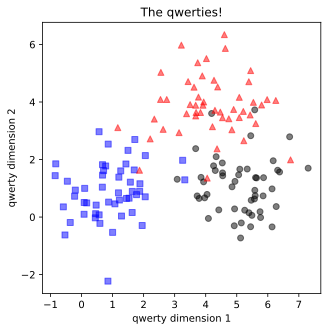

In [2]:
# a function that creates data

def createSomeData(nPerClust):

  A = [ 1, 1 ]
  B = [ 5, 1 ]
  C = [ 4, 4 ]

  # generate data
  a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
  b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]
  c = [ C[0]+np.random.randn(nPerClust) , C[1]+np.random.randn(nPerClust) ]

  # true labels
  labels_np = np.hstack(( np.zeros((nPerClust)),
                          np.ones( (nPerClust)),
                        1+np.ones( (nPerClust))  ))

  # concatanate into a matrix, then convert to a pytorch tensor
  data_np = np.hstack((a,b,c)).T

  # NEW: put all outputs into a dictionary
  output = {}
  output['data'] = torch.tensor(data_np).float()
  output['labels'] = torch.tensor(labels_np).long() # note: "long" format (integers) for labels

  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(output['data'], output['labels'], train_size=.9)

  # then convert them into PyTorch Datasets (note: already converted to tensors)
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # finally, translate into dataloader objects
  batchsize  = 8
  output['train_data'] = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  output['test_data']  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return output


# Check that the function works

theData = createSomeData(50)

data = theData['data']
labels = theData['labels']

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

### 2.2 Create a Model

In [3]:
# create a class for the model
def createTheQwertyNet(nUnits,nLayers):

  class qwertyNet(nn.Module):
    def __init__(self,nUnits,nLayers):
      super().__init__()

      # create dictionary to store the layers
      self.layers = nn.ModuleDict()
      self.nLayers = nLayers

      ### input layer
      self.layers['input'] = nn.Linear(2,nUnits)
      
      ### hidden layers
      for i in range(nLayers):
        self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)

      ### output layer
      self.layers['output'] = nn.Linear(nUnits,3)
    

    # forward pass
    def forward(self,x):
      # input layer
      x = self.layers['input'](x)

      # hidden layers
      for i in range(self.nLayers):
        x = F.relu( self.layers[f'hidden{i}'](x) )
      
      # return output layer
      x = self.layers['output'](x)
      return x
  
  # create the model instance
  net = qwertyNet(nUnits,nLayers)
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [4]:
def function2trainTheModel(nUnits,nLayers):

  # number of epochs
  numepochs = 50
  
  # create a new model
  net,lossfun,optimizer = createTheQwertyNet(nUnits,nLayers)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_data:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_data)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) ) 
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net


In [5]:
# before the experiment, configure and confirm the metaparameters

# specify the parameters for the model
nNodesInModel = 80
layersRange   = [ 1,5,10,20 ]
nDatapoints   = np.arange(50,551,50)

# create a legend for later plotting
legend = []

# print out the model architectures
for lidx,layers in enumerate(layersRange):

  # create a model
  unitsperlayer = int(nNodesInModel/layersRange[lidx])
  net = createTheQwertyNet(unitsperlayer,layers)[0]

  # count its parameters (see lecture ANNs:Depth vs. breadth)
  nparams = np.sum([ p.numel() for p in net.parameters() if p.requires_grad ])

  legend.append( '%s layers, %s units, %s params' %(layers,unitsperlayer,nparams) )
  print('This model will have %s layers, each with %s units, totalling %s parameters' %(layers,unitsperlayer,nparams))

This model will have 1 layers, each with 80 units, totalling 6963 parameters
This model will have 5 layers, each with 16 units, totalling 1459 parameters
This model will have 10 layers, each with 8 units, totalling 771 parameters
This model will have 20 layers, each with 4 units, totalling 427 parameters


In [6]:
# note: takes ~5 mins

# initialize results matrix
results = np.zeros((len(nDatapoints),len(layersRange),2))

for didx,pnts in enumerate(nDatapoints):
  
  # create data (note: same data for each layer manipulation!)
  theData = createSomeData(pnts)
  train_data = theData['train_data']
  test_data  = theData['test_data']


  # now loop over layers
  for lidx,layers in enumerate(layersRange):
    
    unitsperlayer = int(nNodesInModel/layersRange[lidx])
    trainAcc,testAcc,losses,net = function2trainTheModel(unitsperlayer,layers)

    # average of last 5 accuracies and losses
    results[didx,lidx,0] = np.mean( testAcc[-5:] )
    results[didx,lidx,1] = torch.mean(losses[-5:]).item()

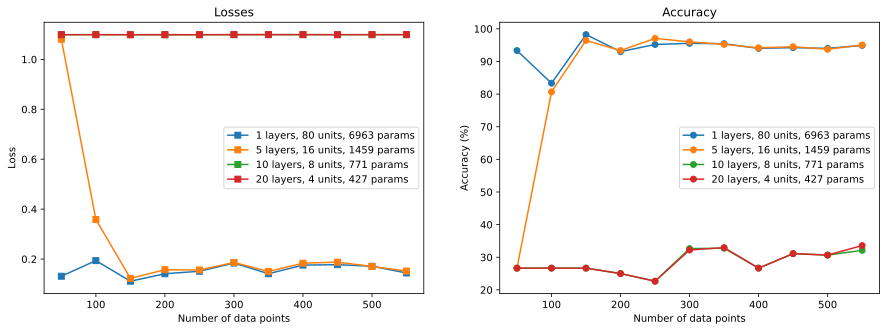

In [7]:
# show the results!

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(nDatapoints,results[:,:,1],'s-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of data points')
ax[0].legend(legend)
ax[0].set_title('Losses')

ax[1].plot(nDatapoints,results[:,:,0],'o-')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Number of data points')
ax[1].set_title('Accuracy')
ax[1].legend(legend)
plt.show()

# Interpretation: 
#   Learning depends more on the architecture and the nature of the problem, than on the number of parameters.

# 3. Unbalanced Data ––– Oversampling

### 3.1 A function that returns a dataset with a specified size

In [13]:
 # import dataset (comes with colab!)
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')


# now for the function
def makeTheDataset(N,doubleTheData=False):

  # extract labels (number IDs) and remove from data
  labels = dataFull[:N,0]
  data   = dataFull[:N,1:]

  # normalize the data to a range of [0 1]
  dataNorm = data / np.max(data)


  # # make an exact copy of ALL the data
  # if doubleTheData:
  #   dataNorm = np.concatenate((dataNorm,dataNorm),axis=0)
  #   labels   = np.concatenate((labels,labels),axis=0)


  # convert to tensor
  dataT   = torch.tensor( dataNorm ).float()
  labelsT = torch.tensor( labels ).long()

  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, train_size=.9)


  # make an exact copy of the TRAIN data
  if doubleTheData:
    train_data   = torch.cat((train_data,train_data),axis=0)
    train_labels = torch.cat((train_labels,train_labels),axis=0)
  

  # convert into PyTorch Datasets
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # translate into dataloader objects
  batchsize    = 20
  train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return train_loader,test_loader

### 3.2 Create the DL model

In [14]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

### 3.3 Create a function that trains the model

In [15]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 50
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

### 3.4 Run an experiment showing better performance with increased N


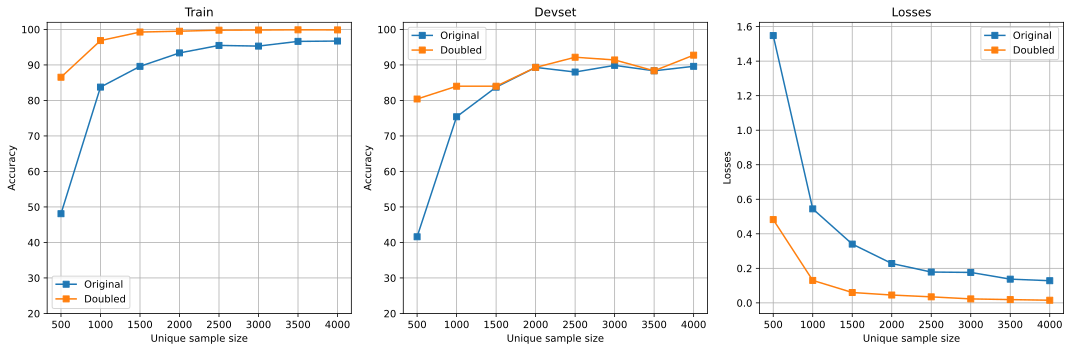

In [16]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

  ### without doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,False)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsSingle[idx,0] = np.mean(trainAcc[-5:])
  resultsSingle[idx,1] = np.mean(testAcc[-5:])
  resultsSingle[idx,2] = torch.mean(losses[-5:]).item()


  ### with doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,True)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsDouble[idx,0] = np.mean(trainAcc[-5:])
  resultsDouble[idx,1] = np.mean(testAcc[-5:])
  resultsDouble[idx,2] = torch.mean(losses[-5:]).item()



# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Doubled')
  
  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

In [12]:
 # Over-sampling useful for small datasets but not for large datasets

# 4. Unbalanced Data ––– Data Noise Augmentation

### 4.1 A function that returns a dataset with a specified size with test data

In [18]:
# import dataset (comes with colab!)
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# normalize the data to a range of [0 1]
dataFull[:,1:] = dataFull[:,1:] / np.max(dataFull)


# now for the function
def makeTheDataset(N,doubleTheData=False):

  # extract labels (number IDs) and remove from data
  data   = dataFull[:N,1:]
  labels = dataFull[:N,0]


  # make a noisy copy of ALL the data
  if doubleTheData:
    dataN  = data + np.random.random_sample(data.shape)/2
    # re-normalize the dataN here to avoid exceeds to the limit of the pixel
    data   = np.concatenate((data,dataN),axis=0)
    labels = np.concatenate((labels,labels),axis=0)


  # convert to tensor
  dataT   = torch.tensor( data   ).float()
  labelsT = torch.tensor( labels ).long()

  # use scikitlearn to split the data
  train_data,devset_data, train_labels,devset_labels = train_test_split(dataT, labelsT, train_size=.9)


  # # make a noisy copy of the TRAIN data
  # if doubleTheData:
  #   train_dataN  = train_data + torch.rand_like(train_data)/2
  #   train_data   = torch.cat((train_data,train_dataN),axis=0)
  #   train_labels = torch.cat((train_labels,train_labels),axis=0)
  

  # convert into PyTorch Datasets
  train_data  = TensorDataset(train_data,train_labels)
  devset_data = TensorDataset(devset_data,devset_labels)

  # translate into dataloader objects
  batchsize     = 20
  train_loader  = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  devset_loader = DataLoader(devset_data,batch_size=devset_data.tensors[0].shape[0])



  # NEW!! Create a test set (don't need a dataloader)
  testdata   = torch.tensor( dataFull[N:,1:] ).float()
  testlabels = torch.tensor( dataFull[N:,0]  ).long()

  return train_loader,devset_loader,(testdata,testlabels)

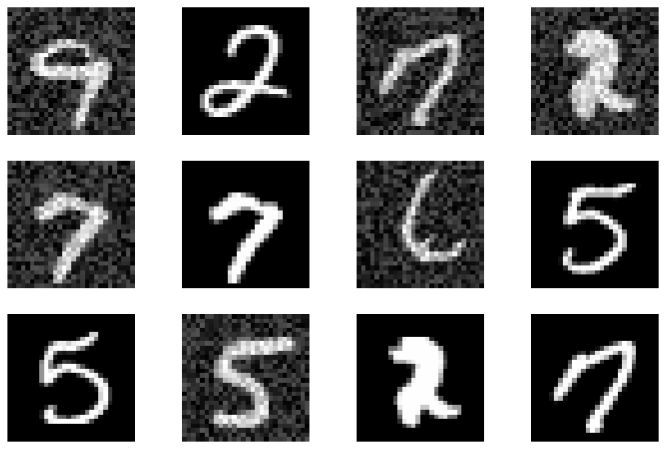

In [19]:
# visualize the images

# get some sample data
train_loader,devset_loader,testdataset = makeTheDataset(12,True)

# pop out the data matrices
img = train_loader.dataset.tensors[0].detach()

# show the numbers
fig,ax = plt.subplots(3,4,figsize=(12,8))
for i,ax in enumerate(ax.flatten()):
  ax.imshow(np.reshape(img[i,:],(28,28)) ,cmap='gray')
  ax.axis('off')
plt.show()

### 4.2 Create the DL model

In [20]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)
      
      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)
  
  # create the model instance
  net = mnistNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

### 4.3 Create a function that trains the model

In [21]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 50
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  devsetAcc = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # devset accuracy
    X,y = next(iter(devset_loader)) # extract X,y from devset dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    devsetAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,devsetAcc,losses,net

### 4.4 Run an experiment showing better performance with increased N

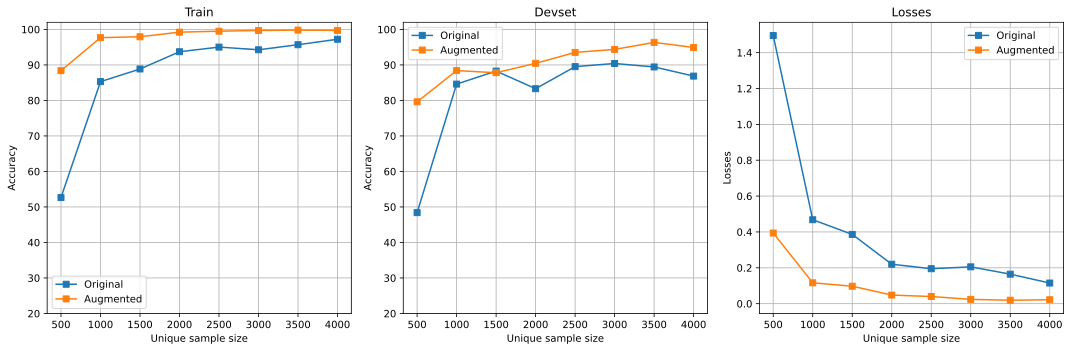

In [22]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))


for idx,ssize in enumerate(samplesizes):

  ### without doubling the data!

  # generate a dataset and train the model
  train_loader,devset_loader,testdataset = makeTheDataset(ssize,False)
  trainAcc,devsetAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsSingle[idx,0] = np.mean(trainAcc[-5:])
  resultsSingle[idx,1] = np.mean(devsetAcc[-5:])
  resultsSingle[idx,2] = torch.mean(losses[-5:]).item()




  ### with doubling the data!

  # generate a dataset and train the model
  train_loader,devset_loader,testdataset = makeTheDataset(ssize,True)
  trainAcc,devsetAcc,losses,net          = function2trainTheModel()

  # grab the results
  resultsDouble[idx,0] = np.mean(trainAcc[-5:])
  resultsDouble[idx,1] = np.mean(devsetAcc[-5:])
  resultsDouble[idx,2] = torch.mean(losses[-5:]).item()


# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Augmented')
  
  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

### 4.5 Test Accuracy

In [23]:
# we need to re-run the models for N=500

samplesize = 500

train_loader,devset_loader,testdataset  = makeTheDataset(samplesize,False)
trainAccO,devsetAccO,lossesO,netO       = function2trainTheModel() # O = original

train_loader,devset_loader,testdataset  = makeTheDataset(samplesize,True)
trainAccA,devsetAccA,lossesA,netA       = function2trainTheModel() # A = augmented


# Now for the real test! On the test data!

# extract the test data
X,y = testdataset

# run the original model
yHat = netO(X)
testO = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# And the augmented model
yHat = netA(X)
testA = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())

# print the results!
print( f'ORIGINAL MODEL (N={samplesize}):\n  Train: {trainAccO[-1]:.2f}%, devset: {devsetAccO[-1]:.2f}%, test: {testO:.2f}%\n\n')
print(f'AUGMENTED MODEL (N={samplesize}):\n  Train: {trainAccA[-1]:.2f}%, devset: {devsetAccA[-1]:.2f}%, test: {testA:.2f}%')


ORIGINAL MODEL (N=500):
  Train: 55.91%, devset: 58.00%, test: 51.00%


AUGMENTED MODEL (N=500):
  Train: 88.44%, devset: 86.00%, test: 77.90%


In [24]:
# Only beneficial for the relative small samples

# 5. Unbalanced Data ––– Data Feature Augmentation

### 5.1 Create the data

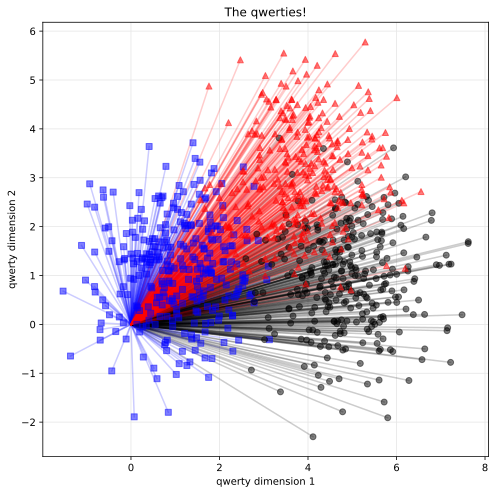

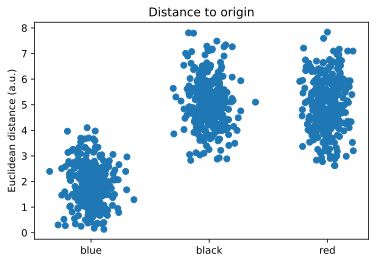

torch.Size([900, 2])
torch.Size([900, 3])
 
tensor([[ 0.6341,  1.3327,  1.4759],
        [ 0.7056,  0.3967,  0.8094],
        [-0.1048,  1.8588,  1.8618],
        ...,
        [ 4.2449,  3.9441,  5.7944],
        [ 3.5043,  4.8752,  6.0040],
        [ 5.6520,  3.2598,  6.5247]])


In [25]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(8,8))
# draw distance to origin
color = 'bkr'
for i in range(len(data)):
  plt.plot([0,data[i,0]],[0,data[i,1]],color=color[labels[i]],alpha=.2)

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)

plt.grid(color=[.9,.9,.9])
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# compute Euclidean distance to the origin
dist2orig = torch.sqrt( data[:,0]**2 + data[:,1]**2 )

plt.plot(labels+torch.randn(900)/10,dist2orig,'o')
plt.xticks([0,1,2],labels=['blue','black','red'])
plt.ylabel('Euclidean distance (a.u.)')
plt.title('Distance to origin')
plt.show()

# And add that to the data matrix
dataAug = torch.cat((data,dist2orig.view(len(data),1)),axis=1)

# check data sizes
print(data.shape)
print(dataAug.shape)
print(' ')

# look at some of the data
print(dataAug)

# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataAug, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

### 5.2 Create the model

In [26]:
# create a class for the model
def createTheQwertyNet(useExtraFeature=False):

  class qwertyNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      if useExtraFeature:
        self.input = nn.Linear(3,8)
      else:
        self.input = nn.Linear(2,8)
      
      ### hidden layer
      self.fc1 = nn.Linear(8,8)

      ### output layer
      self.output = nn.Linear(8,3)

    # forward pass
    def forward(self,x):

      # by request, only use XY features
      # print(x.shape) # comment out during training!
      if not useExtraFeature:
        x = x[:,:2]
      # print(x.shape) # comment out during training!

      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      return self.output(x)
  
  # create the model instance
  net = qwertyNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.001)

  return net,lossfun,optimizer


# test the model

print('Using augmented feature:')
net = createTheQwertyNet(True)[0]
net(next(iter(train_loader))[0]);

print('\nNot using augmented feature:')
net = createTheQwertyNet(False)[0]
net(next(iter(train_loader))[0]);


# a function that trains the model

def function2trainTheModel(useExtraFeature=False):

  # number of epochs
  numepochs = 200
  
  # create a new model
  net,lossfun,optimizer = createTheQwertyNet(useExtraFeature)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) ) 
  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

  

Using augmented feature:

Not using augmented feature:


### 5.3 Create a function to plot results

In [27]:
#
def plotTheResults():

  # compute accuracy over entire dataset (train+test)
  yHat = net(dataAug)
  predictions = torch.argmax(yHat,axis=1)
  accuracy = (predictions == labels).float()

  # and accuracy by group
  accuracyByGroup = np.zeros(3)
  for i in range(3):
    accuracyByGroup[i] = 100*torch.mean(accuracy[labels==i])


  # create the figure
  fig,ax = plt.subplots(2,2,figsize=(10,6))

  # plot the loss function
  ax[0,0].plot(losses.detach())
  ax[0,0].set_ylabel('Loss')
  ax[0,0].set_xlabel('epoch')
  ax[0,0].set_title('Losses')

  # plot the accuracy functions
  ax[0,1].plot(trainAcc,label='Train')
  ax[0,1].plot(testAcc,label='Test')
  ax[0,1].set_ylabel('Accuracy (%)')
  ax[0,1].set_xlabel('Epoch')
  ax[0,1].set_title('Accuracy')
  ax[0,1].legend()

  # plot overall accuracy by group
  ax[1,0].bar(range(3),accuracyByGroup)
  ax[1,0].set_ylim([np.min(accuracyByGroup)-5,np.max(accuracyByGroup)+5])
  ax[1,0].set_xticks([0,1,2])
  ax[1,0].set_xlabel('Group')
  ax[1,0].set_ylabel('Accuracy (%)')
  ax[1,0].set_title('Accuracy by group')

  # scatterplot of correct and incorrect labeled data
  colorShapes = [ 'bs','ko','g^' ] # data markers
  for i in range(3):
    # plot all data points
    ax[1,1].plot(dataAug[labels==i,0],dataAug[labels==i,1],colorShapes[i],
                 alpha=.3,label=f'Group {i}')
    
    # cross-out the incorrect ones
    idxErr = (accuracy==0) & (labels==i)
    ax[1,1].plot(dataAug[idxErr,0],dataAug[idxErr,1],'rx')

  ax[1,1].set_title('All groups')
  ax[1,1].set_xlabel('qwerty dimension 1')
  ax[1,1].set_ylabel('qwerty dimension 2')
  ax[1,1].legend()
  
  plt.tight_layout()
  plt.show()

### 5.4 Test the Model with and w/t additional features

Final accuracy: 88.89%


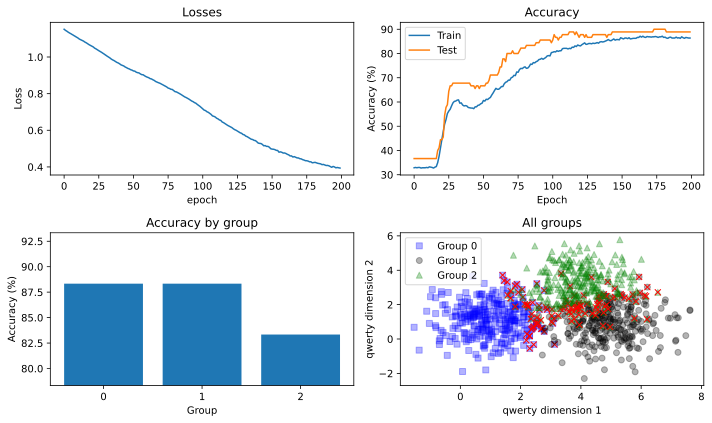

Final accuracy: 87.78%


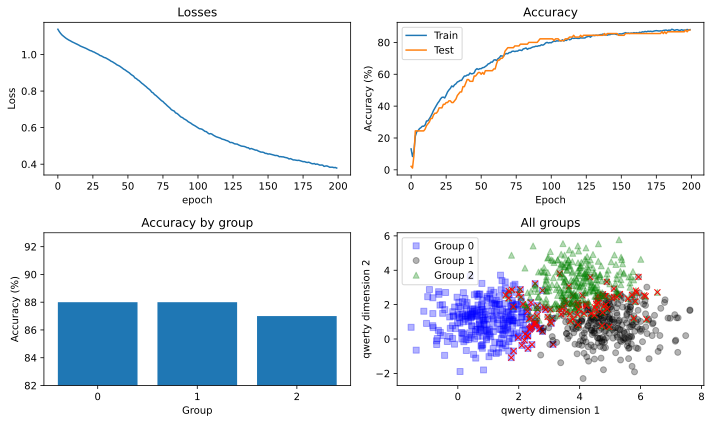

In [28]:
# run the model and visualize the results
trainAcc,testAcc,losses,net = function2trainTheModel(False)
print('Final accuracy: %.2f%%' %testAcc[-1].item())
plotTheResults()


# run the model and visualize the results
trainAcc,testAcc,losses,net = function2trainTheModel(True)
print('Final accuracy: %.2f%%' %testAcc[-1].item())
plotTheResults()

### 5.5 Run the experiment

In [29]:
# Run the experiment multiple times and do a t-test!
# (takes ~3 mins)

finalacc2 = np.zeros(10)
finalacc3 = np.zeros(10)

for i in range(10):
  finalacc2[i] = function2trainTheModel(False)[1][-1]
  finalacc3[i] = function2trainTheModel(True)[1][-1]

# show the numbers
print( np.round(np.vstack((finalacc2,finalacc3)).T,2) )

# run the t-test and print the results
from scipy import stats
t,p = stats.ttest_ind(finalacc3,finalacc2)
print('\n\nt=%.2f, p=%.2f' %(t,p))

[[87.78 88.89]
 [88.89 86.67]
 [85.56 86.67]
 [84.44 88.89]
 [86.67 88.89]
 [86.67 68.89]
 [85.56 88.89]
 [88.89 88.89]
 [87.78 88.89]
 [87.78 85.56]]


t=-0.44, p=0.66


In [30]:
# Data Augmentation can be a useful method for increasing discriminability of different classes

# No advantage the new feature is being a linear combination of existing features

# Non-linear is better but not guranteed to improve the performance as deep learning is alreay nonlinear model

# Common used on signal processing

# 6. Getting data into colab

### 6.1 Torchvision

In [31]:
import torchvision

# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

# Datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


### 6.2 Download from the web

In [32]:
import pandas as pd

# url
marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'

# import directly into pandas
data = pd.read_excel(marriage_url,header=5)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.80678,7.81779,8.2,8.4,8.2,8.3,8.6,8.9,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.50884,7.29393,7.2,7.8,8.0,7.8,8.4,8.5,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.78045,5.40109,5.6,5.7,5.9,5.6,6.0,6.4,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112,9.75105,10.9,10.4,10.8,10.7,10.6,12.0,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.44149,6.46047,6.0,5.8,5.8,5.8,6.7,6.2,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.0616,6.45266,6.8,7.0,6.9,6.9,7.4,7.1,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.36884,5.02102,5.2,5.5,5.6,5.9,5.4,5.5,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.02278,6.57198,5.8,5.2,5.2,5.4,5.5,5.7,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.8213,10.7913,8.4,8.7,7.6,4.7,4.1,4.2,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2


### 6.3 Upload from the drive

In [33]:
from google.colab import files
uploaded = files.upload()

### 6.4 Map your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 7. Save and Load the trained models

In [ ]:
# save the model
torch.save(net.state_dict(),'trainedModel.pt')

# Load in the model under a different name

# create two new models of the same class
model1 = createTheMNISTNet()[0]
model2 = createTheMNISTNet()[0]

# replace one model's parameters with those of the trained net
model1.load_state_dict(torch.load('trainedModel.pt'))

# 8. Save the Best Trained Models

### 8.1 Create the Data

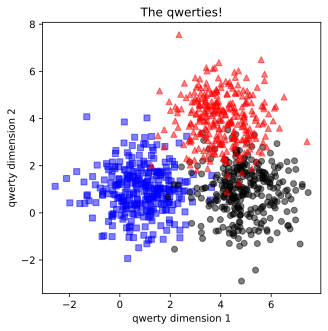

   Total data size: torch.Size([900, 2])

Training data size: torch.Size([500, 2])
  Devset data size: torch.Size([200, 2])
    Test data size: torch.Size([200, 2])


In [37]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 4 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()



# specify sizes of the partitions
# order is train,devset,test
partitions = [3*nPerClust-400,200,200]

# split the data
train_data,devtest_data, train_labels,devtest_labels = train_test_split(data, labels, train_size=partitions[0])

# now split the devtest data
dev_data,test_data, dev_labels,test_labels = train_test_split(devtest_data, devtest_labels, train_size=partitions[1])


# print out the sizes
print('   Total data size: ' + str(data.shape) + '\n')
print('Training data size: ' + str(train_data.shape))
print('  Devset data size: ' + str(dev_data.shape))
print('    Test data size: ' + str(test_data.shape))


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
dev_data   = TensorDataset(dev_data,dev_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 30
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
dev_loader   = DataLoader(dev_data,batch_size=dev_data.tensors[0].shape[0])
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

### 8.2 Create and validate the model

In [47]:
# create a class for the model
def createTheQwertyNet():

  class qwertyNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(2,8)
      
      ### hidden layer
      self.fc1 = nn.Linear(8,8)

      ### output layer
      self.output = nn.Linear(8,3)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      return self.output(x)
  
  # create the model instance
  net = qwertyNet()
  
  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer


### 8.3 A function trains the model

In [48]:
import copy
def funtion2trainTheModel():

  # New! initialize a dictionary for the best model
  theBestModel = {'Accuracy':0, 'net':None}


  # number of epochs
  numepochs = 100
  
  # create a new model
  net,lossfun,optimizer = createTheQwertyNet()

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  devAcc   = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    net.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(dev_loader)) # extract X,y from devset dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
      
    # compare the following really long line of code to the training accuracy lines
    devAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )


    # New! Store this model if it's the best so far
    if devAcc[-1]>theBestModel['Accuracy']:
      
      # new best accuracy
      theBestModel['Accuracy'] = devAcc[-1].item()
      
      # model's internal state
      theBestModel['net'] = copy.deepcopy( net.state_dict() )
      
  # end epochs

  # function output
  return trainAcc,devAcc,losses,theBestModel

### 8.4 Run the model and plot the results

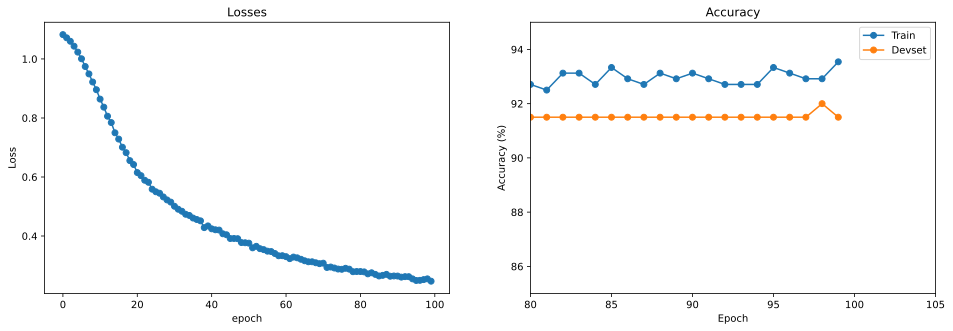

{'Accuracy': 92.0, 'net': OrderedDict([('input.weight', tensor([[ 0.2899,  1.0137],
        [-0.6619, -0.2755],
        [ 0.8974, -0.3356],
        [-0.3421, -0.1473],
        [-0.2672,  0.2577],
        [ 0.5890, -0.0582],
        [ 0.1516, -0.2424],
        [-0.6523, -0.2451]])), ('input.bias', tensor([-0.8418, -0.3146, -0.5865,  0.0236,  1.0442,  0.1838,  0.3005, -0.3510])), ('fc1.weight', tensor([[ 0.9081,  0.1142, -0.2357,  0.2628, -0.3784,  0.3101, -0.1995,  0.2288],
        [-0.3240,  0.2284,  0.5759,  0.3446, -0.2725,  0.4863,  0.0570,  0.1626],
        [ 0.0477,  0.1000, -0.0311, -0.3271,  0.2422, -0.2684,  0.0926, -0.0423],
        [-0.1308, -0.3031, -0.1887,  0.1485, -0.2855, -0.1253,  0.1123,  0.1339],
        [-0.2461,  0.1388,  0.2408, -0.3254, -0.2105,  0.3611,  0.1701,  0.3249],
        [-0.3267,  0.0847,  0.0686,  0.1317, -0.2301, -0.1547,  0.2349, -0.1218],
        [-0.2289,  0.1364, -0.0784, -0.2272,  0.3570, -0.2043, -0.2114, -0.2832],
        [ 0.4223,  0.1303,  0.

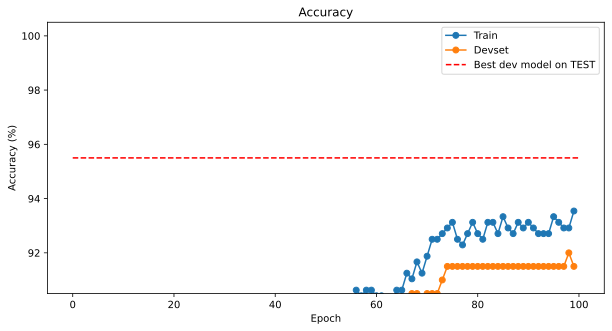

In [49]:
# run the model
trainAcc,devAcc,losses,theBestModel = funtion2trainTheModel()

fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses.detach(),'o-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc,'o-',label='Train')
ax[1].plot(devAcc,'o-',label='Devset')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
ax[1].set_ylim([85,95])
ax[1].set_xlim([80,105])
ax[1].legend()
plt.show()

print(theBestModel)

# extract X,y from test dataloader
X,y = next(iter(test_loader)) 

# yHat = theBestModel['net'](X)

# recreate the best-performing model
bestnet = createTheQwertyNet()[0]
bestnet.load_state_dict(theBestModel['net'])


# and run the data through TEST
X,y = next(iter(test_loader)) 
yHat = bestnet(X)

bestAcc = 100*torch.mean((torch.argmax(yHat,axis=1)==y).float())
bestAcc

fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'o-',label='Train')
plt.plot(devAcc,'o-',label='Devset')
plt.plot([0,len(devAcc)],[bestAcc,bestAcc],'r--',label='Best dev model on TEST')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.ylim([bestAcc-5,bestAcc+5])
plt.legend()
plt.show()